In [ ]:
### Setup Environment ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stats test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA

# Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

torvik = pd.read_csv('torvik_women_historical.csv')
print(torvik.shape)
teams = pd.read_csv('wncaat_teams_historical.csv')
print(teams.shape)

df = pd.merge(teams, torvik, on='torvik_id', how='inner')
print(df.shape)
df.head()

(1782, 26)
(336, 8)
(336, 33)


,team_id,year_x,team_x,region,seed,finish,weekend,torvik_id,year_y,rank,...,ftr,ftrd,2p_pct,2pd_pct,3p_pct,3pd_pct,3pr,3prd,adj_tempo,wab
0,2021 South Dakota St.,2021,South Dakota St.,East,9,First Round,1,2021 South Dakota St.,2021,52,...,38.0000,28.6000,49.4000,44.2000,31.7000,29.0000,37.2000,35.7000,68.0000,2.3000
1,2021 Marquette,2021,Marquette,East,10,First Round,1,2021 Marquette,2021,35,...,23.1000,22.2000,49.6000,43.6000,32.0000,29.7000,21.1000,31.2000,71.2000,1.4000
2,2021 Florida Gulf Coast,2021,Florida Gulf Coast,East,11,First Round,1,2021 Florida Gulf Coast,2021,47,...,24.5000,33.6000,60.0000,42.7000,33.7000,26.3000,54.7000,27.3000,73.5000,0.6000
3,2021 Central Michigan,2021,Central Michigan,East,12,First Round,1,2021 Central Michigan,2021,102,...,23.1000,27.5000,54.6000,49.1000,35.5000,33.6000,45.5000,36.7000,69.5000,-3.3000
4,2021 Idaho St.,2021,Idaho St.,East,13,First Round,1,2021 Idaho St.,2021,75,...,22.8000,29.7000,50.5000,40.4000,33.7000,25.9000,30.4000,37.1000,69.8000,-0.4500


In [ ]:
X = df[['adj_oe', 'adj_de', 'barthag', 'efg_pct', 'efgd_pct', 'tor', 'tord',
        'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct', '3p_pct',
        '3pd_pct', '3pr', '3prd', 'adj_tempo', 'wab']]
y = df['weekend']

In [ ]:
# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,adj_oe,67.9085,0.0000,0.1894
1,adj_de,59.9911,0.0000,0.1812
2,barthag,25.6360,0.0000,0.3713
3,efg_pct,14.0133,0.0000,0.0601
4,efgd_pct,16.4371,0.0000,0.0476
5,tor,8.0576,0.0004,0.0645
6,tord,0.6235,0.5367,0.0000
7,orb_pct,17.8673,0.0000,0.0347
8,drb_pct,11.4780,0.0000,0.0699
9,ftr,0.0532,0.9482,0.0306


In [ ]:
feature_df = stats_df[stats_df['mutual_info'] > .05]
feature_df

,feature,f_values,p_values,mutual_info
0,adj_oe,67.9085,0.0000,0.1894
1,adj_de,59.9911,0.0000,0.1812
2,barthag,25.6360,0.0000,0.3713
3,efg_pct,14.0133,0.0000,0.0601
5,tor,8.0576,0.0004,0.0645
8,drb_pct,11.4780,0.0000,0.0699
17,adj_tempo,5.1404,0.0063,0.0839
18,wab,101.3177,0.0000,0.2907


In [ ]:
feature_df = feature_df[feature_df['p_values'] < .05]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
18,wab,101.3177,0.0000,0.2907
0,adj_oe,67.9085,0.0000,0.1894
1,adj_de,59.9911,0.0000,0.1812
2,barthag,25.6360,0.0000,0.3713
3,efg_pct,14.0133,0.0000,0.0601
8,drb_pct,11.4780,0.0000,0.0699
5,tor,8.0576,0.0004,0.0645
17,adj_tempo,5.1404,0.0063,0.0839


In [ ]:
vars_df = df[['adj_oe',
              'adj_de',
              'barthag',
              'efg_pct',
              'efgd_pct',
              'orb_pct',
              'drb_pct',
              '2p_pct',
              '2pd_pct',
              'wab'
           ]]

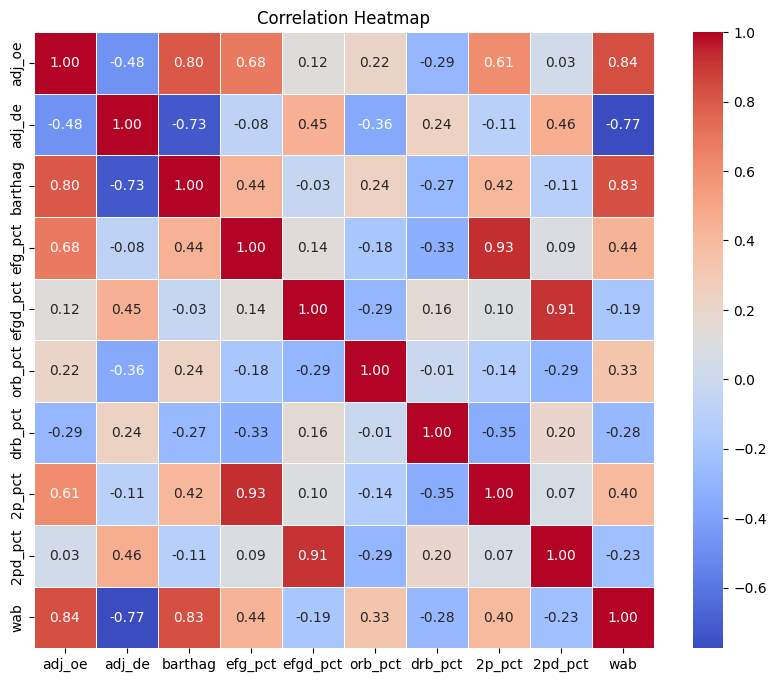

In [ ]:
corr_matrix = vars_df.corr()

plt.figure(figsize=(10, 8))  # Optional: specify the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sc = StandardScaler()
scaled_array = sc.fit_transform(vars_df)
model_df = pd.DataFrame(scaled_array)
model_df.columns = ['adj_oe',
              'adj_de',
              'barthag',
              'efg_pct',
              'efgd_pct',
              'orb_pct',
              'drb_pct',
              '2p_pct',
              '2pd_pct',
              'wab']
model_df.head()

,adj_oe,adj_de,barthag,efg_pct,efgd_pct,orb_pct,drb_pct,2p_pct,2pd_pct,wab
0,-0.2481,0.3008,0.1879,-0.1625,0.2100,-0.5069,-0.4323,0.1145,0.5344,0.0696
1,-0.0599,-0.1702,0.4270,0.0020,0.2100,0.8326,-0.8425,0.1643,0.3481,-0.0886
2,-0.2168,0.1124,0.2828,1.5375,-0.5665,-2.7045,-1.4736,2.7537,0.0686,-0.2292
3,0.2748,2.4672,-0.6983,1.2908,2.3175,-0.8837,-0.0221,1.4092,2.0561,-0.9146
4,-0.8547,0.2380,-0.1938,0.3311,-1.3060,-0.3395,-0.3376,0.3884,-0.6457,-0.4137


In [ ]:
# Fit K-Means Clustering Mode
kmeans4 = KMeans(n_clusters=5, init='k-means++', algorithm='lloyd',
                 max_iter=500, random_state=123)
kmeans4.fit_predict(model_df)
df['cluster'] = kmeans4.labels_

In [ ]:
pd.crosstab(index=df['finish'], columns=df['cluster'])

cluster,0,1,2,3,4
finish,,,,,
Champion,0,0,5,0,0
Elite Eight,5,0,13,1,1
Final Four,0,0,10,0,0
First Round,35,65,7,35,34
Runner Up,0,0,2,1,2
Second Round,28,0,8,25,19
Sweet 16,7,0,16,9,8


In [ ]:
df = df[['team_id', 'year_x', 'seed', 'finish', 'rank', 'wab', 'barthag', 'adj_oe', 'adj_de', 'cluster']]
df['barthag_rtg_rank'] = df.groupby('year_x')['barthag'].rank(method='min', ascending=False)
df.to_csv('tiers_test.csv')

In [ ]:
# Label Tiers
df['tier'] = ''

### S Tier ###
df.loc[(df['cluster']==2) & (df['barthag_rtg_rank']<=4), 'tier'] = 'S'

### A Tier ###
df.loc[(df['cluster']==2) & (df['barthag_rtg_rank']>4) & (df['seed']<=3), 'tier'] = 'A'
df.loc[(df['cluster']==3) & (df['barthag_rtg_rank']<=8) & (df['seed']<=3), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['barthag_rtg_rank']<=8) & (df['seed']<=3), 'tier'] = 'A'

### B Tier ###
df.loc[(df['cluster']==0) & (df['barthag_rtg_rank']<=24) & (df['seed']<=6), 'tier'] = 'B'
df.loc[(df['cluster']==2) & (df['seed']>3) & (df['seed']<=6), 'tier'] = 'B'
df.loc[(df['cluster']==3) & (df['barthag_rtg_rank']<=8) & (df['seed']>3), 'tier'] = 'B'
df.loc[(df['cluster']==4) & (df['barthag_rtg_rank']<=8) & (df['seed']>3), 'tier'] = 'B'


### C Tier ###
df.loc[(df['cluster']==0) & (df['barthag_rtg_rank']>24) & (df['seed']<=6), 'tier'] = 'C'
df.loc[(df['cluster']==0) & (df['barthag_rtg_rank']<=24) & (df['seed']>6), 'tier'] = 'C'
df.loc[(df['cluster']==0) & (df['barthag_rtg_rank']>24) & (df['seed']<=9), 'tier'] = 'C'
df.loc[(df['cluster']==3) & (df['barthag_rtg_rank']>8) & (df['seed']<=3), 'tier'] = 'C'
df.loc[(df['cluster']==3) & (df['barthag_rtg_rank']<=8) & (df['seed']>3), 'tier'] = 'C'
df.loc[(df['cluster']==3) & (df['seed']>3) & (df['seed']<=6), 'tier'] = 'C'
df.loc[(df['cluster']==4) & (df['barthag_rtg_rank']>8) & (df['seed']<=3), 'tier'] = 'C'
df.loc[(df['cluster']==4) & (df['barthag_rtg_rank']<=8) & (df['seed']>3), 'tier'] = 'C'
df.loc[(df['cluster']==4) & (df['seed']>3) & (df['seed']<=6), 'tier'] = 'C'

### D Tier ###
df.loc[(df['cluster']==0) & (df['seed']>9) & (df['seed']<=12), 'tier'] = 'D'
df.loc[(df['cluster']==2) & (df['seed']>6), 'tier'] = 'D'
df.loc[(df['cluster']==3) & (df['seed']>6) & (df['seed']<=12), 'tier'] = 'D'
df.loc[(df['cluster']==4) & (df['seed']>6) & (df['seed']<=12), 'tier'] = 'D'

### F Tier ###
df.loc[(df['cluster']==0) & (df['seed']>12), 'tier'] = 'F'
df.loc[(df['cluster']==1), 'tier'] = 'F'
df.loc[(df['cluster']==3) & (df['seed']>12), 'tier'] = 'F'
df.loc[(df['cluster']==4) & (df['seed']>12), 'tier'] = 'F'

In [ ]:
pd.crosstab(index=df['finish'], columns=df['tier'])

tier,A,B,C,D,F,S
finish,,,,,,
Champion,0,0,0,0,0,5
Elite Eight,10,5,1,1,0,3
Final Four,4,0,0,0,0,6
First Round,0,7,14,67,88,0
Runner Up,3,0,0,0,0,2
Second Round,4,9,33,32,1,1
Sweet 16,7,12,15,3,0,3


In [ ]:
df.to_csv('tiers_test.csv')